In [13]:
# import statements
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

from keras.datasets import cifar10
from keras.datasets import mnist

from quiver_engine import server
from matplotlib.pyplot import imshow

## Keras

### Data import

In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# normalize the data
x_train, x_test = x_train/255., x_test/255.

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

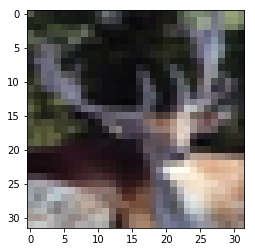

In [5]:
# check an image
imshow(x_train[563])

### Model definition

**Data Augmentation**

In [6]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(x_train)

# # fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=20)

**Initializers**

In [7]:
w_init = keras.initializers.glorot_normal()
b_init = keras.initializers.zeros()
w_dense_init = keras.initializers.random_normal()

**Optimizer and Callbacks**

In [8]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="auto")

**Model**

In [9]:
model = Sequential([
    Conv2D(filters=32, input_shape=(32, 32, 3), 
           kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_1"),
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_1", padding="same"),

    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_2"), 
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_2", padding="same"),
    
    Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding="same", use_bias=True,
           kernel_initializer=w_init, bias_initializer=b_init, activation="relu", name="Conv_3"), 
    MaxPool2D(pool_size=(2,2), strides=(2,2), name="Pool_3", padding="same"),
    
    Flatten(),
    
    Dense(units=512, use_bias=True, kernel_initializer=w_dense_init, bias_initializer=b_init,
         activation="relu", name="Dense_2"),
    
    Dropout(rate=0.5),
    
    Dense(units=10, use_bias=True, kernel_initializer=w_dense_init, bias_initializer=b_init,
         activation="softmax", name="Dense_3")
])

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

**Training**

In [10]:
model.fit(x=x_train, y=y_train, epochs=20, batch_size=32, validation_split=.15, callbacks=[early_stopping])

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 [==============================] - 353s - loss: 1.6081 - categorical_accuracy: 0.4107 - val_loss: 1.2775 - val_categorical_accuracy: 0.5360
Epoch 2/20
42500/42500 [==============================] - 316s - loss: 1.1927 - categorical_accuracy: 0.5753 - val_loss: 1.0374 - val_categorical_accuracy: 0.6399
Epoch 3/20
42500/42500 [==============================] - 345s - loss: 1.0138 - categorical_accuracy: 0.6419 - val_loss: 0.9840 - val_categorical_accuracy: 0.6557
Epoch 4/20
42500/42500 [==============================] - 393s - loss: 0.8903 - categorical_accuracy: 0.6881 - val_loss: 0.9190 - val_categorical_accuracy: 0.6828
Epoch 5/20
42500/42500 [==============================] - 409s - loss: 0.7977 - categorical_accuracy: 0.7199 - val_loss: 0.9268 - val_categorical_accuracy: 0.6861
Epoch 6/20
42500/42500 [==============================] - 507s - loss: 0.7113 - categorical_accuracy: 0.7510 - val_loss: 0.8618 - val_ca

**Evaluation**

In [11]:
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 31s    


[0.95791912837028503, 0.70689999999999997]

In [12]:
server.launch(model, input_folder="./img")

Starting webserver from: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/quiver_engine


::1 - - [2017-12-14 10:31:04] "GET / HTTP/1.1" 304 235 0.138061
::1 - - [2017-12-14 10:31:04] "GET /app.c1d3d21cfba8c1aabed6806773c8f0ba.css HTTP/1.1" 304 235 0.043538
::1 - - [2017-12-14 10:31:05] "GET /vendor.280c5ce1d78077ee8d66.js HTTP/1.1" 304 236 0.054985
::1 - - [2017-12-14 10:31:05] "GET /app.14b8092d6ea379715007.js HTTP/1.1" 304 239 0.133988
::1 - - [2017-12-14 10:31:06] "GET /model HTTP/1.1" 200 5982 0.008068
::1 - - [2017-12-14 10:31:06] "GET /inputs HTTP/1.1" 200 210 0.002717
::1 - - [2017-12-14 10:31:07] "GET /input-file/img_1.png HTTP/1.1" 304 241 0.027909
::1 - - [2017-12-14 10:31:07] "GET /input-file/mnist_1.png HTTP/1.1" 304 242 0.037866
[2017-12-14 10:31:10,185] ERROR in app: Exception on /predict/mnist_1.png [GET]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-12-14 10:31:10] "GET /predict/mnist_1.png HTTP/1.1" 500 478 0.759171
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/quiver_engine/layer_result_generators.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("Co..., outputs=Tensor("Co...)`
  output=model.get_layer(layer_name).output
::1 - - [2017-12-14 10:31:11] "GET /layer/Conv_1/mnist_1.png HTTP/1.1" 200 1192 1.367692
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_1_mnist_1.png.png HTTP/1.1" 200 916 0.015555
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_6_mnist_1.png.png HTTP/1.1" 200 928 0.004186
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_7_mnist_1.png.png HTTP/1.1" 200 776 0.004578
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_8_mnist_1.png.png HTTP/1.1" 200 877 0.002896
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_9_mnist_1.png.png HTTP/1.1" 200 919 0.002911
::1 - - [2017-12-14 10:31:11] "GET /temp-file/Conv_1_10_mnist

::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_29_mnist_1.png.png HTTP/1.1" 200 409 0.007359
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_30_mnist_1.png.png HTTP/1.1" 200 394 0.004819
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_31_mnist_1.png.png HTTP/1.1" 200 390 0.045626
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_32_mnist_1.png.png HTTP/1.1" 200 464 0.007164
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_33_mnist_1.png.png HTTP/1.1" 200 392 0.003355
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_34_mnist_1.png.png HTTP/1.1" 200 390 0.003932
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_35_mnist_1.png.png HTTP/1.1" 200 389 0.005780
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_36_mnist_1.png.png HTTP/1.1" 200 390 0.006952
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_37_mnist_1.png.png HTTP/1.1" 200 440 0.008332
::1 - - [2017-12-14 10:31:22] "GET /temp-file/Conv_2_38_mnist_1.png.png HTTP/1.1" 200 502 0.006227
::1 - - [2

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-12-14 10:31:36] "GET /predict/img_1.png HTTP/1.1" 500 478 0.016302
::1 - - [2017-12-14 10:31:37] "GET /layer/Conv_1/img_1.png HTTP/1.1" 200 1127 1.369368
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_0_img_1.png.png HTTP/1.1" 200 1070 0.002041
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_1_img_1.png.png HTTP/1.1" 200 986 0.002779
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_2_img_1.png.png HTTP/1.1" 200 1026 0.002193
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_3_img_1.png.png HTTP/1.1" 200 1141 0.002498
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_4_img_1.png.png HTTP/1.1" 200 1005 0.002739
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_6_img_1.png.png HTTP/1.1" 200 1050 0.003553
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_11_img_1.png.png HTTP/1.1" 200 981 0.004736
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_5_img_1.png.png HTTP/1.1" 200 1034 0.002228
::1 - - [2017-12-14 10:31:37] "GET /temp-file/Conv_1_9_im

::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_37_img_1.png.png HTTP/1.1" 200 447 0.006010
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_46_img_1.png.png HTTP/1.1" 200 404 0.002829
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_47_img_1.png.png HTTP/1.1" 200 391 0.004668
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_48_img_1.png.png HTTP/1.1" 200 410 0.002717
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_40_img_1.png.png HTTP/1.1" 200 390 0.001820
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_42_img_1.png.png HTTP/1.1" 200 391 0.002478
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_43_img_1.png.png HTTP/1.1" 200 391 0.004308
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_45_img_1.png.png HTTP/1.1" 200 623 0.001584
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_38_img_1.png.png HTTP/1.1" 200 526 0.004700
::1 - - [2017-12-14 10:32:13] "GET /temp-file/Conv_2_50_img_1.png.png HTTP/1.1" 200 440 0.002243
::1 - - [2017-12-14 10:32:13] 

::1 - - [2017-12-14 10:32:37] "GET /layer/Conv_2/img_1.png HTTP/1.1" 200 2088 0.219834
::1 - - [2017-12-14 10:32:38] "GET /layer/Pool_2/img_1.png HTTP/1.1" 200 2088 0.231952
::1 - - [2017-12-14 10:32:39] "GET /layer/Conv_2/img_1.png HTTP/1.1" 200 2088 0.219367
::1 - - [2017-12-14 10:32:40] "GET /layer/Pool_2/img_1.png HTTP/1.1" 200 2088 0.221557
::1 - - [2017-12-14 10:32:41] "GET /layer/Conv_2/img_1.png HTTP/1.1" 200 2088 0.234428
::1 - - [2017-12-14 10:32:43] "GET /layer/Pool_2/img_1.png HTTP/1.1" 200 2088 0.230330
::1 - - [2017-12-14 10:32:49] "GET /layer/Conv_3/img_1.png HTTP/1.1" 200 4036 5.356686
::1 - - [2017-12-14 10:32:49] "GET /temp-file/Conv_3_0_img_1.png.png HTTP/1.1" 200 423 0.005178
::1 - - [2017-12-14 10:32:49] "GET /temp-file/Conv_3_3_img_1.png.png HTTP/1.1" 200 415 0.005648
::1 - - [2017-12-14 10:32:49] "GET /temp-file/Conv_3_2_img_1.png.png HTTP/1.1" 200 390 0.002811
::1 - - [2017-12-14 10:32:49] "GET /temp-file/Conv_3_8_img_1.png.png HTTP/1.1" 200 390 0.003013
::1 - -

::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_99_img_1.png.png HTTP/1.1" 200 391 0.009641
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_105_img_1.png.png HTTP/1.1" 200 433 0.001570
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_100_img_1.png.png HTTP/1.1" 200 437 0.003515
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_107_img_1.png.png HTTP/1.1" 200 389 0.002271
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_102_img_1.png.png HTTP/1.1" 200 389 0.004584
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_109_img_1.png.png HTTP/1.1" 200 389 0.002116
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_103_img_1.png.png HTTP/1.1" 200 393 0.005372
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_111_img_1.png.png HTTP/1.1" 200 393 0.005398
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_112_img_1.png.png HTTP/1.1" 200 389 0.001946
::1 - - [2017-12-14 10:32:50] "GET /temp-file/Conv_3_98_img_1.png.png HTTP/1.1" 200 434 0.003618
::1 - - [2017-12-14 10

::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_51_img_1.png.png HTTP/1.1" 200 390 0.002814
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_61_img_1.png.png HTTP/1.1" 200 388 0.004897
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_53_img_1.png.png HTTP/1.1" 200 389 0.037544
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_63_img_1.png.png HTTP/1.1" 200 392 0.002012
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_64_img_1.png.png HTTP/1.1" 200 392 0.008056
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_65_img_1.png.png HTTP/1.1" 200 389 0.005130
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_57_img_1.png.png HTTP/1.1" 200 396 0.003724
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_67_img_1.png.png HTTP/1.1" 200 389 0.002450
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_68_img_1.png.png HTTP/1.1" 200 388 0.003197
::1 - - [2017-12-14 10:33:24] "GET /temp-file/Pool_3_69_img_1.png.png HTTP/1.1" 200 388 0.002027
::1 - - [2017-12-14 10:33:24] 

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-12-14 10:33:36] "GET /predict/mnist_1.png HTTP/1.1" 500 478 0.014826
::1 - - [2017-12-14 10:33:41] "GET /layer/Pool_3/mnist_1.png HTTP/1.1" 200 4292 4.588485
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_0_mnist_1.png.png HTTP/1.1" 200 405 0.002559
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_1_mnist_1.png.png HTTP/1.1" 200 388 0.002111
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_2_mnist_1.png.png HTTP/1.1" 200 388 0.003222
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_3_mnist_1.png.png HTTP/1.1" 200 389 0.003198
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_5_mnist_1.png.png HTTP/1.1" 200 387 0.002777
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_10_mnist_1.png.png HTTP/1.1" 200 390 0.002887
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_11_mnist_1.png.png HTTP/1.1" 200 389 0.003800
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_12_mnist_1.png.png HTTP/1.1" 200 405 0.003129
::1 - - [2017-12-14 10:33:41] "GET /temp-

::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_95_mnist_1.png.png HTTP/1.1" 200 387 0.004200
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_97_mnist_1.png.png HTTP/1.1" 200 388 0.002710
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_106_mnist_1.png.png HTTP/1.1" 200 388 0.005868
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_107_mnist_1.png.png HTTP/1.1" 200 389 0.003006
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_108_mnist_1.png.png HTTP/1.1" 200 389 0.002940
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_92_mnist_1.png.png HTTP/1.1" 200 388 0.003724
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_110_mnist_1.png.png HTTP/1.1" 200 389 0.002402
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_100_mnist_1.png.png HTTP/1.1" 200 397 0.002194
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_104_mnist_1.png.png HTTP/1.1" 200 387 0.001987
::1 - - [2017-12-14 10:33:41] "GET /temp-file/Pool_3_105_mnist_1.png.png HTTP/1.1" 200 395 0.002364
::1

::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_75_mnist_1.png.png HTTP/1.1" 200 408 0.048209
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_87_mnist_1.png.png HTTP/1.1" 200 388 0.005598
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_80_mnist_1.png.png HTTP/1.1" 200 389 0.002131
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_81_mnist_1.png.png HTTP/1.1" 200 389 0.002661
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_73_mnist_1.png.png HTTP/1.1" 200 389 0.004298
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_91_mnist_1.png.png HTTP/1.1" 200 397 0.004397
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_92_mnist_1.png.png HTTP/1.1" 200 389 0.002952
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_93_mnist_1.png.png HTTP/1.1" 200 389 0.006249
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_94_mnist_1.png.png HTTP/1.1" 200 412 0.006168
::1 - - [2017-12-14 10:33:55] "GET /temp-file/Conv_3_86_mnist_1.png.png HTTP/1.1" 200 389 0.002541
::1 - - [2

::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_43_mnist_1.png.png HTTP/1.1" 200 389 0.057810
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_50_mnist_1.png.png HTTP/1.1" 200 426 0.002164
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_44_mnist_1.png.png HTTP/1.1" 200 397 0.001688
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_46_mnist_1.png.png HTTP/1.1" 200 396 0.002158
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_47_mnist_1.png.png HTTP/1.1" 200 389 0.001758
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_48_mnist_1.png.png HTTP/1.1" 200 403 0.002333
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_49_mnist_1.png.png HTTP/1.1" 200 389 0.004084
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_56_mnist_1.png.png HTTP/1.1" 200 454 0.001943
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_51_mnist_1.png.png HTTP/1.1" 200 394 0.004057
::1 - - [2017-12-14 10:34:11] "GET /temp-file/Pool_2_58_mnist_1.png.png HTTP/1.1" 200 407 0.002614
::1 - - [2

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-12-14 10:34:43] "GET /predict/img_1.png HTTP/1.1" 500 478 0.012467
::1 - - [2017-12-14 10:34:43] "GET /layer/Conv_1/img_1.png HTTP/1.1" 200 1127 0.255827
::1 - - [2017-12-14 10:35:01] "GET /layer/Pool_1/img_1.png HTTP/1.1" 200 1127 0.132776
::1 - - [2017-12-14 10:35:02] "GET /layer/Conv_2/img_1.png HTTP/1.1" 200 2088 0.252717
::1 - - [2017-12-14 10:35:08] "GET /layer/Conv_1/img_1.png HTTP/1.1" 200 1127 0.142578
KeyboardInterrupt
Thu Dec 14 10:36:01 2017


KeyboardInterrupt: 